In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
path='C:/Users/KBrig/ML-Pipeline/BankMarketing/bank-full.csv'
BankData = pd.read_csv(path,encoding='cp1252', sep=';')

In [210]:
BankData.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [211]:
BankData.shape

(45211, 17)

In [212]:
BankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [213]:
BankData.y.describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

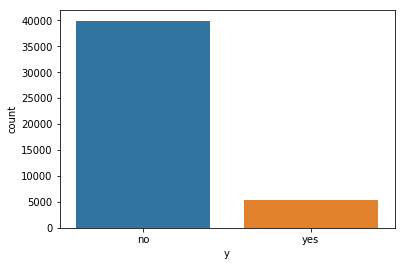

In [214]:
sns.countplot(x='y', data = BankData)

It looks like we have much more "no" than "yes" results in imbalanced data!

In [215]:
BankData['y_num']= BankData['y'].map({'no':1,'yes':0})

Let's explor the connections of the target varible with the predictors!

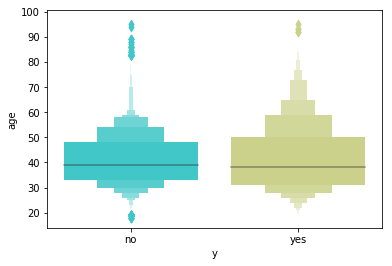

In [216]:
sns.boxenplot(x='y',y='age', data= BankData, palette='rainbow')

Text(0.5,1,'Counts of the Un./Subscribers with respect to their Marital Status')

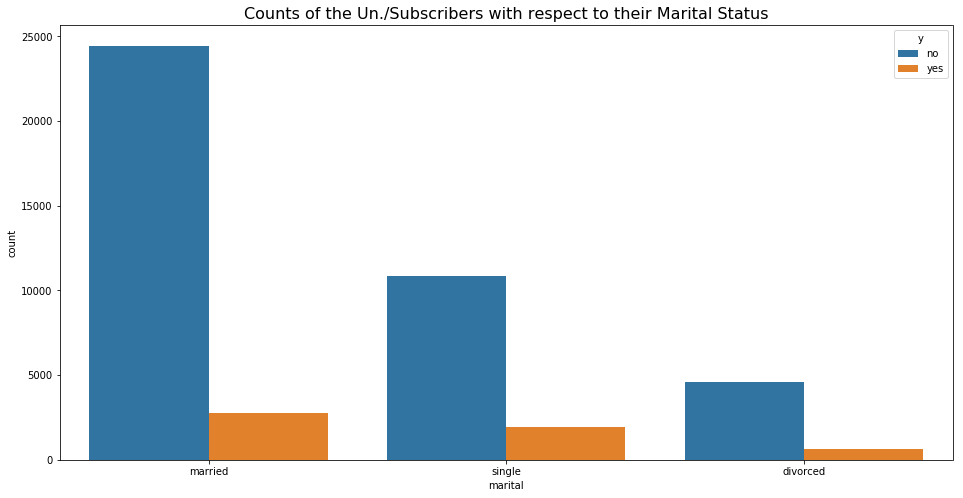

In [217]:
f, ax = plt.subplots(figsize=(16, 8))
f=sns.countplot(x='marital', data= BankData, hue='y')
ax.set_title('Counts of the Un./Subscribers with respect to their Marital Status', fontsize=16)

It looks like we have similar distribution for both classes (yes/no) with respect to the age of the clients!

Text(0.5,1,'Counts of the Un./Subscribers with respect to their Jobs')

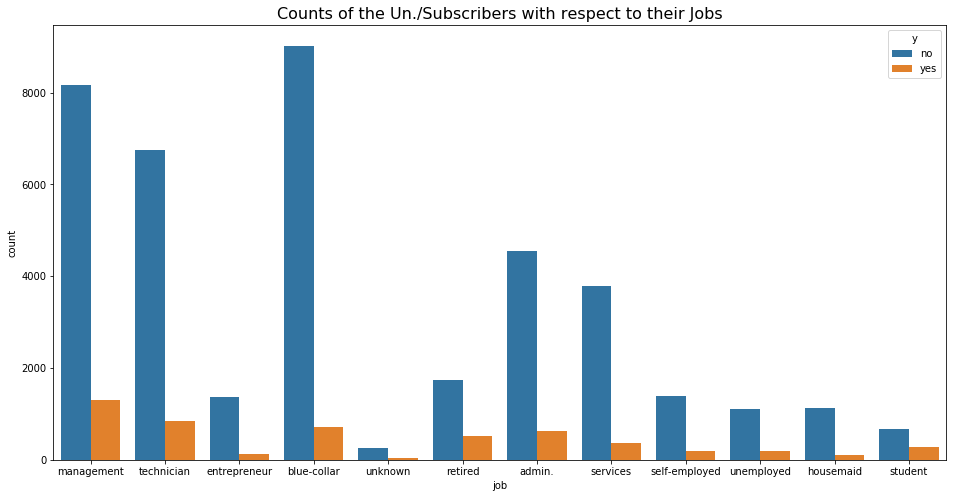

In [218]:
f, ax = plt.subplots(figsize=(16, 8))
f=sns.countplot(x='job', data= BankData, hue='y')
ax.set_title('Counts of the Un./Subscribers with respect to their Jobs', fontsize=16)

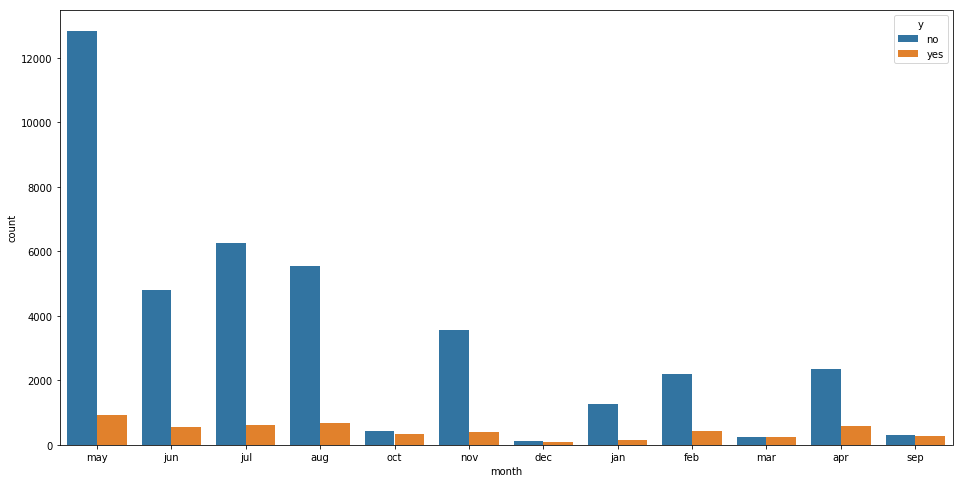

In [219]:
f, ax = plt.subplots(figsize=(16, 8))
fig=sns.countplot(x='month', data= BankData, hue='y')

Encoding the catogirical attributes 

In [220]:
BankData_catog= BankData[['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'poutcome']]

In [221]:
BankData_catog.head()

,job,marital,education,default,housing,loan,contact,poutcome
0,management,married,tertiary,no,yes,no,unknown,unknown
1,technician,single,secondary,no,yes,no,unknown,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,unknown
4,unknown,single,unknown,no,no,no,unknown,unknown


In [222]:
def unq(x):
    return x.unique()
for i in BankData_catog.columns:
    print(i,":",unq(BankData_catog[i]))

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
poutcome : ['unknown' 'failure' 'other' 'success']


In [223]:
from sklearn.preprocessing import LabelEncoder

In [224]:
def lblEncoder(x):
    gle = LabelEncoder()
    Datalabels = gle.fit_transform(x)
    data_mappings = {index: label for index, label in enumerate(gle.classes_)}
    return(Datalabels)


In [225]:
def mapPrint(z):
    gle = LabelEncoder()
    gle.fit_transform(z)
    print({index: label for index, label in enumerate(gle.classes_)})


In [226]:
for i in BankData_catog.columns:
    mapPrint(BankData_catog[i])
    

{0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}
{0: 'divorced', 1: 'married', 2: 'single'}
{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}
{0: 'no', 1: 'yes'}
{0: 'no', 1: 'yes'}
{0: 'no', 1: 'yes'}
{0: 'cellular', 1: 'telephone', 2: 'unknown'}
{0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}


In [227]:
BankData_catog=BankData_catog.apply(lambda x:lblEncoder(x))
BankData_catog.head()

,job,marital,education,default,housing,loan,contact,poutcome
0,4,1,2,0,1,0,2,3
1,9,2,1,0,1,0,2,3
2,2,1,1,0,1,1,2,3
3,1,1,3,0,1,0,2,3
4,11,2,3,0,0,0,2,3


In [228]:
BankData['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [229]:
BankData_catog['month']= BankData['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})

In [230]:
BankData_catog['age']= BankData['age']

In [231]:
BankData_catog['balance']= BankData['balance']

In [232]:
BankData_catog['day']= BankData['day']

In [233]:
BankData_catog['campaign']= BankData['campaign']

In [234]:
BankData_catog['pdays']= BankData['pdays']

In [235]:
BankData_catog['previous']= BankData['previous']

In [236]:
cle = LabelEncoder()
genre_labels = cle.fit_transform(BankData['y'])
genre_mappings = {index: label for index, label in enumerate(cle.classes_)}
genre_mappings

{0: 'no', 1: 'yes'}

In [237]:
BankData_catog['y']=genre_labels

In [238]:
BankData_catog.head()

,job,marital,education,default,housing,loan,contact,poutcome,month,age,balance,day,campaign,pdays,previous,y
0,4,1,2,0,1,0,2,3,5,58,2143,5,1,-1,0,0
1,9,2,1,0,1,0,2,3,5,44,29,5,1,-1,0,0
2,2,1,1,0,1,1,2,3,5,33,2,5,1,-1,0,0
3,1,1,3,0,1,0,2,3,5,47,1506,5,1,-1,0,0
4,11,2,3,0,0,0,2,3,5,33,1,5,1,-1,0,0


In [239]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(BankData['job'])
hashed_features = hashed_features.toarray()
#pd.concat([BankData['job'], pd.DataFrame(hashed_features)],axis=1).iloc[1:12]
MappedDta=pd.DataFrame(hashed_features,columns=[['Job0','Job1','Job2','Job3','Job4','Job5']])

In [240]:
MappedDta.head()


,Job0,Job1,Job2,Job3,Job4,Job5
0,-2.0,2.0,1.0,-1.0,2.0,0.0
1,-2.0,1.0,1.0,-3.0,0.0,-3.0
2,-3.0,7.0,0.0,-1.0,1.0,0.0
3,0.0,2.0,4.0,0.0,1.0,-2.0
4,-3.0,0.0,0.0,0.0,1.0,-1.0


In [241]:
fh = FeatureHasher(n_features=2, input_type='string')
hashed_features = fh.fit_transform(BankData['marital'])
hashed_features = hashed_features.toarray()
#pd.concat([BankData['marital'], pd.DataFrame(hashed_features)],axis=1).iloc[1:12]
MappedDta2=pd.DataFrame(hashed_features,columns=[['marital0','marital1']])

In [242]:
MappedDta2.head()

,marital0,marital1
0,2.0,3.0
1,-1.0,-1.0
2,2.0,3.0
3,2.0,3.0
4,-1.0,-1.0


In [243]:
fh = FeatureHasher(n_features=2, input_type='string')
hashed_features = fh.fit_transform(BankData['education'])
hashed_features = hashed_features.toarray()
#pd.concat([BankData['marital'], pd.DataFrame(hashed_features)],axis=1).iloc[1:12]
MappedDta3=pd.DataFrame(hashed_features,columns=[['ed0','ed1']])
MappedDta3.head()

,ed0,ed1
0,2.0,0.0
1,1.0,2.0
2,1.0,2.0
3,-2.0,-1.0
4,-2.0,-1.0


In [273]:
fh = FeatureHasher(n_features=2, input_type='string')
hashed_features = fh.fit_transform(BankData['default'])
hashed_features = hashed_features.toarray()
#pd.concat([BankData['marital'], pd.DataFrame(hashed_features)],axis=1).iloc[1:12]
MappedDta4=pd.DataFrame(hashed_features,columns=[['def0','def1']])
MappedDta4.head()

,def0,def1
0,-1.0,1.0
1,-1.0,1.0
2,-1.0,1.0
3,-1.0,1.0
4,-1.0,1.0


In [272]:
fh = FeatureHasher(n_features=2, input_type='string')
hashed_features = fh.fit_transform(BankData['housing'])
hashed_features = hashed_features.toarray()
#pd.concat([BankData['marital'], pd.DataFrame(hashed_features)],axis=1).iloc[1:12]
MappedDta5=pd.DataFrame(hashed_features,columns=[['hos0','hos1']])
MappedDta5.head()

,hos0,hos1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,-1.0,1.0


In [271]:
fh = FeatureHasher(n_features=2, input_type='string')
hashed_features = fh.fit_transform(BankData['loan'])
hashed_features = hashed_features.toarray()
#pd.concat([BankData['marital'], pd.DataFrame(hashed_features)],axis=1).iloc[1:12]
MappedDta6=pd.DataFrame(hashed_features,columns=[['lon0','lon1']])
MappedDta6.head()

,lon0,lon1
0,-1.0,1.0
1,-1.0,1.0
2,1.0,0.0
3,-1.0,1.0
4,-1.0,1.0


In [270]:
fh = FeatureHasher(n_features=2, input_type='string')
hashed_features = fh.fit_transform(BankData['contact'])
hashed_features = hashed_features.toarray()
#pd.concat([BankData['marital'], pd.DataFrame(hashed_features)],axis=1).iloc[1:12]
MappedDta7=pd.DataFrame(hashed_features,columns=[['con0','con1']])
MappedDta7.head()

,con0,con1
0,-2.0,-1.0
1,-2.0,-1.0
2,-2.0,-1.0
3,-2.0,-1.0
4,-2.0,-1.0


In [269]:
fh = FeatureHasher(n_features=5, input_type='string')
hashed_features = fh.fit_transform(BankData['month'])
hashed_features = hashed_features.toarray()
#pd.concat([BankData['marital'], pd.DataFrame(hashed_features)],axis=1).iloc[1:12]
MappedDta8=pd.DataFrame(hashed_features,columns=[['mnth0','mnth1','mnth2','mnth3','mnth4']])
MappedDta8.head()

,mnth0,mnth1,mnth2,mnth3,mnth4
0,1.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,1.0


In [249]:
MappedDta=pd.concat([MappedDta,MappedDta2,MappedDta3,MappedDta4,MappedDta5,MappedDta6,MappedDta7,MappedDta8], axis=1)

In [250]:
MappedDta.head()

,Job0,Job1,Job2,Job3,Job4,Job5,marital0,marital1,ed0,ed1,...,hos1,lon0,lon1,con0,con1,mnth0,mnth1,mnth2,mnth3,mnth4
0,-2.0,2.0,1.0,-1.0,2.0,0.0,2.0,3.0,2.0,0.0,...,0.0,-1.0,1.0,-2.0,-1.0,1.0,1.0,0.0,0.0,1.0
1,-2.0,1.0,1.0,-3.0,0.0,-3.0,-1.0,-1.0,1.0,2.0,...,0.0,-1.0,1.0,-2.0,-1.0,1.0,1.0,0.0,0.0,1.0
2,-3.0,7.0,0.0,-1.0,1.0,0.0,2.0,3.0,1.0,2.0,...,0.0,1.0,0.0,-2.0,-1.0,1.0,1.0,0.0,0.0,1.0
3,0.0,2.0,4.0,0.0,1.0,-2.0,2.0,3.0,-2.0,-1.0,...,0.0,-1.0,1.0,-2.0,-1.0,1.0,1.0,0.0,0.0,1.0
4,-3.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-2.0,-1.0,...,1.0,-1.0,1.0,-2.0,-1.0,1.0,1.0,0.0,0.0,1.0


In [263]:
MappedDta.columns

MultiIndex(levels=[['Job0', 'Job1', 'Job2', 'Job3', 'Job4', 'Job5', 'con0', 'con1', 'def0', 'def1', 'ed0', 'ed1', 'hos0', 'hos1', 'lon0', 'lon1', 'marital0', 'marital1', 'mnth0', 'mnth1', 'mnth2', 'mnth3', 'mnth4']],
           labels=[[0, 1, 2, 3, 4, 5, 16, 17, 10, 11, 8, 9, 12, 13, 14, 15, 6, 7, 18, 19, 20, 21, 22]])

In [251]:
BankData_Num= BankData[['age','balance','day','duration','campaign','pdays','previous']]
BankData_Num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [265]:
MappedDtaFinal= pd.concat([MappedDta,BankData['age'],BankData['balance'],BankData['day'], BankData['duration'],BankData['campaign'],BankData['pdays'],BankData['previous']],axis=1)

In [266]:
MappedDtaFinal.columns=[['Job0', 'Job1', 'Job2', 'Job3', 'Job4', 'Job5', 'con0', 'con1', 'def0', 'def1', 'ed0', 'ed1', 'hos0', 'hos1', 'lon0', 'lon1', 'marital0','marital1', 'mnth0', 'mnth1', 'mnth2', 'mnth3', 'mnth4','age','balance','day','duration','campaign','pdays','previous']]

In [267]:
MappedDtaFinal.head()

,Job0,Job1,Job2,Job3,Job4,Job5,con0,con1,def0,def1,...,mnth2,mnth3,mnth4,age,balance,day,duration,campaign,pdays,previous
0,-2.0,2.0,1.0,-1.0,2.0,0.0,2.0,3.0,2.0,0.0,...,0.0,0.0,1.0,58,2143,5,261,1,-1,0
1,-2.0,1.0,1.0,-3.0,0.0,-3.0,-1.0,-1.0,1.0,2.0,...,0.0,0.0,1.0,44,29,5,151,1,-1,0
2,-3.0,7.0,0.0,-1.0,1.0,0.0,2.0,3.0,1.0,2.0,...,0.0,0.0,1.0,33,2,5,76,1,-1,0
3,0.0,2.0,4.0,0.0,1.0,-2.0,2.0,3.0,-2.0,-1.0,...,0.0,0.0,1.0,47,1506,5,92,1,-1,0
4,-3.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-2.0,-1.0,...,0.0,0.0,1.0,33,1,5,198,1,-1,0
